In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt
print(np.__version__)

1.16.1


### Loading the data

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


### Preprocessing

Rather than using an embedding as in the previous notebook, here we will multi-hot encode 
the sentences. This model will quickly overfit to the training set. It will be used to 
demonstrate when overfitting occurs, and how to fight it.

Multi-hot-encoding our lists means turning them into vectors of 0s and 1s. Concretely, this 
would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that 
would be all-zeros except for indices 3 and 5, which would be ones.

In [0]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


In [0]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

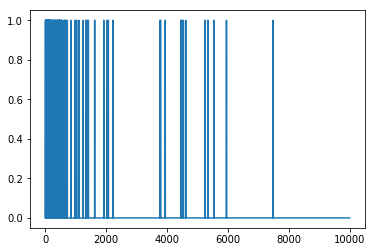

In [6]:
# Let's look at one of the resulting multi-hot vectors. The word indices are sorted by
# frequency, so it is expected that there are more 1-values near index zero, as we can see in this plot:
plt.plot(train_data[0])

In [11]:
print(type(train_data))
train_data[0]

<class 'numpy.ndarray'>


array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


### Model 1 - baseline

In [13]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 - 5s - loss: 0.4972 - acc: 0.8074 - binary_crossentropy: 0.4972 - val_loss: 0.3534 - val_acc: 0.8711 - val_binary_crossentropy: 0.3534
Epoch 2/20
 - 4s - loss: 0.2634 - acc: 0.9081 - binary_crossentropy: 0.2634 - val_loss: 0.2882 - val_acc: 0.8874 - val_binary_crossentropy: 0.2882
Epoch 3/20
 - 4s - loss: 0.1924 - acc: 0.9316 - binary_crossentropy: 0.1924 - val_loss: 0.2860 - val_acc: 0.8863 - val_binary_crossentropy: 0.2860
Epoch 4/20
 - 4s - loss: 0.1554 - acc: 0.9458 - binary_crossentropy: 0.1554 - val_loss: 0.3078 - val_acc: 0.8789 - val_binary_crossentropy: 0.3078
Epoch 5/20
 - 4s - loss: 0.1282 - acc: 0.9568 - binary_crossentropy: 0.1282 - val_loss: 0.3268 - val_acc: 0.8770 - val_binary_crossentropy: 0.3268
Epoch 6/20
 - 4s - loss: 0.1070 - acc: 0.9664 - binary_crossentropy: 0.1070 - val_loss: 0.3549 - val_acc: 0.8730 - val_binary_crossentropy: 0.3549
Epoch 7/20
 - 4s - l

### Model - Smaller

In [15]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6180 - acc: 0.6506 - binary_crossentropy: 0.6180 - val_loss: 0.5628 - val_acc: 0.7909 - val_binary_crossentropy: 0.5628
Epoch 2/20
 - 4s - loss: 0.5113 - acc: 0.8187 - binary_crossentropy: 0.5113 - val_loss: 0.5050 - val_acc: 0.8378 - val_binary_crossentropy: 0.5050
Epoch 3/20
 - 4s - loss: 0.4565 - acc: 0.8762 - binary_cro

### Model - bigger

In [16]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3442 - acc: 0.8482 - binary_crossentropy: 0.3442 - val_loss: 0.2963 - val_acc: 0.8785 - val_binary_crossentropy: 0.2963
Epoch 2/20
 - 19s - loss: 0.1434 - acc: 0.9478 - binary_crossentropy: 0.1434 - val_loss: 0.3298 - val_acc: 0.8736 - val_binary_crossentropy: 0.3298
Epoch 3/20
 - 19s - loss: 0.0461 - acc: 0.9869 - b

### Results

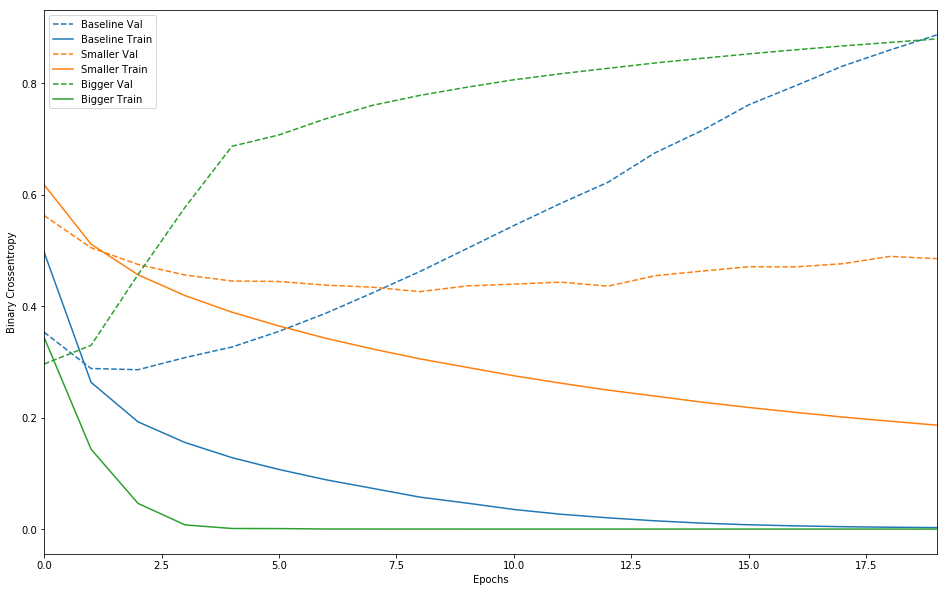

In [17]:
# Plot the training and validation loss

def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Notice that the larger network begins overfitting almost right away, after just one epoch,
and overfits much more severely. The more capacity the network has, the quicker it will 
be able to model the training data (resulting in a low training loss), but the more 
susceptible it is to overfitting (resulting in a large difference between the training 
and validation loss).

### Regularization

1. L1 regularization, where the cost added is proportional to the absolute value of the 
weights coefficients (i.e. to what is called the "L1 norm" of the weights).


2. L2 regularization, where the cost added is proportional to the square of the value of
 the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 
 regularization is also called weight decay in the context of neural networks. Don't 
 let the different name confuse you: weight decay is mathematically the exact same as 
 L2 regularization.

In [0]:
## In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])


In [19]:
l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5558 - acc: 0.7950 - binary_crossentropy: 0.5184 - val_loss: 0.4113 - val_acc: 0.8689 - val_binary_crossentropy: 0.3711
Epoch 2/20
 - 4s - loss: 0.3307 - acc: 0.8994 - binary_crossentropy: 0.2845 - val_loss: 0.3422 - val_acc: 0.8872 - val_binary_crossentropy: 0.2915
Epoch 3/20
 - 4s - loss: 0.2720 - acc: 0.9236 - binary_crossentropy: 0.2182 - val_loss: 0.3382 - val_acc: 0.8868 - val_binary_crossentropy: 0.2826
Epoch 4/20
 - 4s - loss: 0.2475 - acc: 0.9329 - binary_crossentropy: 0.1900 - val_loss: 0.3461 - val_acc: 0.8834 - val_binary_crossentropy: 0.2874
Epoch 5/20
 - 4s - loss: 0.2312 - acc: 0.9412 - binary_crossentropy: 0.1715 - val_loss: 0.3563 - val_acc: 0.8807 - val_binary_crossentropy: 0.2958
Epoch 6/20
 - 4s - loss: 0.2191 - acc: 0.9470 - binary_crossentropy: 0.1576 - val_loss: 0.3655 - val_acc: 0.8791 - val_binary_crossentropy: 0.3036
Epoch 7/20
 - 4s - loss: 0.2108 - acc: 0.9495 - binary_crossentropy:

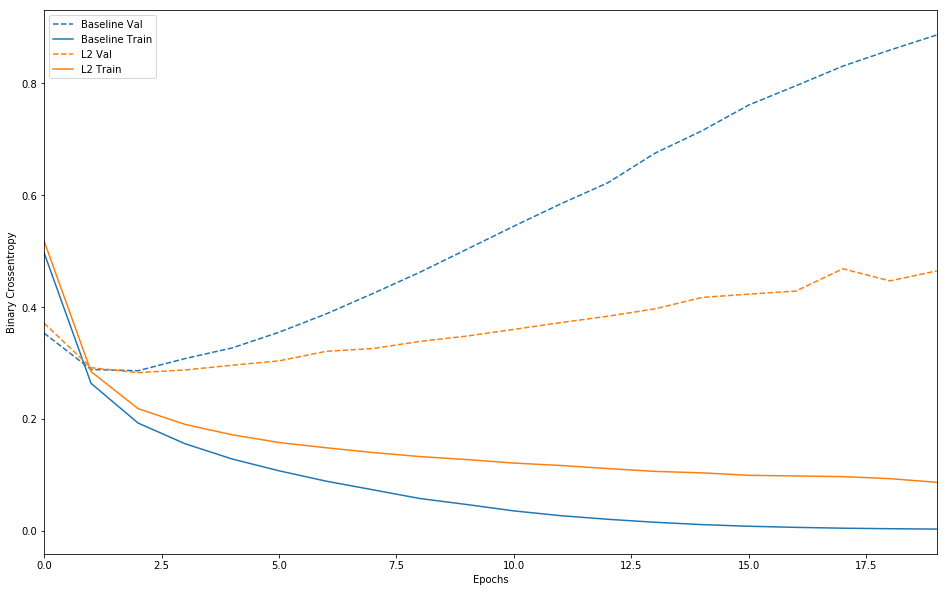

In [20]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

### Dropout

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6012 - acc: 0.6697 - binary_crossentropy: 0.6012 - val_loss: 0.4393 - val_acc: 0.8591 - val_binary_crossentropy: 0.4393
Epoch 2/20
 - 4s - loss: 0.4280 - acc: 0.8239 - binary_crossentropy: 0.4280 - val_loss: 0.3159 - val_acc: 0.8843 - val_binary_crossentropy: 0.3159
Epoch 3/20
 - 4s - loss: 0.3371 - acc: 0.8712 - binary_crossentropy: 0.3371 - val_loss: 0.2804 - val_acc: 0.8880 - val_binary_crossentropy: 0.2804
Epoch 4/20
 - 4s - loss: 0.2769 - acc: 0.8994 - binary_crossentropy: 0.2769 - val_loss: 0.2739 - val_acc: 0.8882 - val_binary_crossentropy: 0.2739
Epoch 5/20
 - 4s - loss: 0.2395 - acc: 0.9134 - binary_crossentropy: 0.2395 - val_loss: 0.2750 - val_acc: 0.8878 - val_binary_crossentropy: 0.2750
Epoch 6/20
 - 4s - loss: 0.2102 - acc: 0.9244 - binary_crossentropy: 0.2102 - val_loss: 0.2868 - val_acc: 0.8852 - val_binary_crossentropy: 0.2868
Epoch 7/20
 - 4s - loss: 0.1880 - acc: 0.9334 - binary_crossentropy:

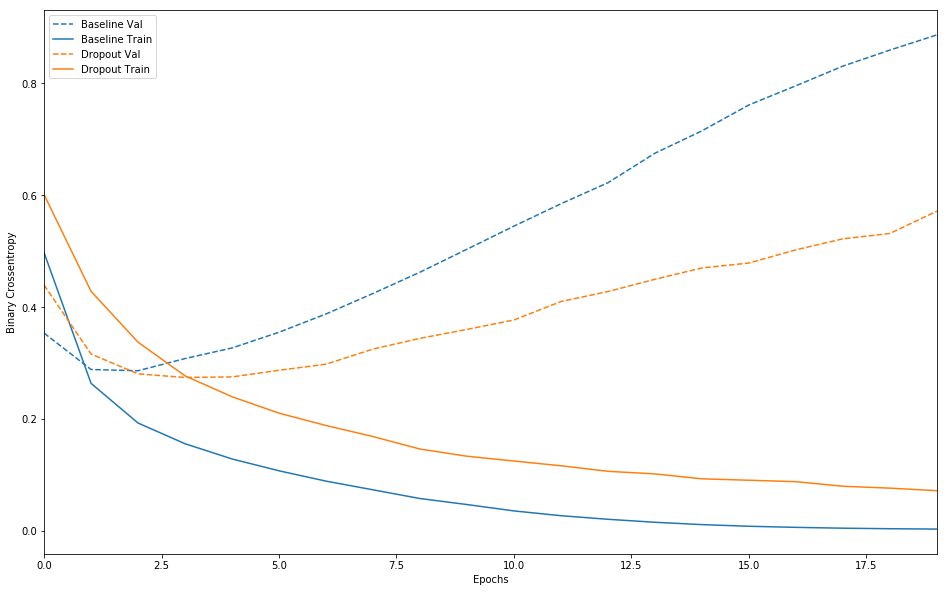

In [23]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

To recap: here the most common ways to prevent overfitting in neural networks:
***
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.
***
And two important approaches not covered in this guide are **data-augmentation** 
and **batch normalization**.
